In [249]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

<h3> DIRECTORIES

In [250]:
base_folder = '../dataset'

<h1> READ EXCEL FILE

In [251]:
dataset_file_name = os.listdir(base_folder)[0]
dataset_file_name = os.path.join(base_folder,dataset_file_name)
print(dataset_file_name)

../dataset\The Impact of Social Media Influencers on Fashion Brand Loyalty DATA.xlsx


In [252]:
dataset_file = pd.ExcelFile(dataset_file_name)

sheets = dataset_file.sheet_names  # see all sheet names

print(sheets)

#dataset_file.parse(sheet_names)  # read a specific sheet to DataFrame

data = dataset_file.parse(sheets[0])
coding = dataset_file.parse(sheets[1])

['Data', 'Coding']


In [253]:
data.head()

,NUMBER,C1,C2,C3,PE1,PE2,PE3,PE4,PC1,PC2,...,BA4,BA5,BL1,BL2,BL3,BL4,BL5,BL6,G1,F1
0,1,1,1,1,5,4,2,5,3,4,...,1,5,3,4,1,2,4,4,2,1
1,2,1,1,1,4,3,2,3,2,4,...,2,4,3,3,4,1,3,4,1,3
2,3,1,1,1,5,4,1,4,3,4,...,1,5,4,4,3,2,4,4,2,1
3,4,1,1,1,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,1,3
4,5,1,1,1,4,4,2,4,2,4,...,2,4,4,4,4,2,3,4,2,1


In [254]:
coding.head()

,Coloumn Number,Variable Name,Variable Code,Coding Instructions,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,A,respondant number,NUMBER,1-252,NaN,NaN,NaN,NaN
1,B,Control Question 1 (Age),C1,1 = Yes,2= No,NaN,NaN,NaN
2,C,Control Question 2 (SA),C2,1 = Yes,2= No,NaN,NaN,NaN
3,D,Control Question 3 (Influencer),C3,1 = Yes,2= No,NaN,NaN,NaN
4,E-H,Percieved Expertise,PE1-PE4,1= Strongly Disagree,2= Disagree,3= Neutral,4= Agree,5 = Strongly Agree


<h1> CODING RESOLUTION

In [255]:
response_group_one = {1:"Yes",2:"No"}
response_group_two = {1:"Strongly Disagree",2:"Disagree",3:"Neutral",4:"Agree",5:"Strongly Agree"}
response_group_three = {1: "Male",2:"Female",3:"Other",4:"Prefer not to say"}
response_group_four = {1: "More than once a day",2:"Once a day", 3: "Most days in a week", 4: "Once a week", 5: "Once a month or less"}
response_groups=[response_group_one,response_group_two,response_group_three,response_group_four]

In [256]:
variable_names = coding.loc[:, 'Variable Name']

print(variable_names)

0                  respondant number 
1            Control Question 1 (Age)
2             Control Question 2 (SA)
3     Control Question 3 (Influencer)
4                Percieved Expertise 
5                Percieved Congruence
6            Influencer Authenticity 
7                               Trust
8         Attitude towards Influencer
9                     Brand Attitude 
10                     Brand Loyalty 
11                             Gender
12      Frequency of Social Media Use
Name: Variable Name, dtype: object


In [257]:
questions = data.columns[1:]

print(questions)

Index(['C1', 'C2', 'C3', 'PE1', 'PE2', 'PE3', 'PE4', 'PC1', 'PC2', 'PC3',
       'PC4', 'AU1', 'AU2', 'AU3', 'AU4', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6',
       'AT1', 'AT2', 'AT3', 'AT4', 'BA1', 'BA2', 'BA3', 'BA4', 'BA5', 'BL1',
       'BL2', 'BL3', 'BL4', 'BL5', 'BL6', 'G1', 'F1'],
      dtype='object')


In [258]:
question_per_variable = [1,1,1,4,4,4,6,4,5,6,1,1]
reponse_group_per_variable = [0,0,0,1,1,1,1,1,1,1,2,3]

In [259]:
data_map = pd.DataFrame()

data_map = data_map.assign(questions=questions,variable_name=[0]*len(questions),response_group=[0]*len(questions))

data_map.head()

,questions,variable_name,response_group
0,C1,0,0
1,C2,0,0
2,C3,0,0
3,PE1,0,0
4,PE2,0,0


In [260]:
row_count=0
var_count=0
for var in question_per_variable:
    for _ in range(var):
        data_map.loc[row_count,"variable_name"]=variable_names[var_count+1]
        data_map.loc[row_count,"response_group"]=reponse_group_per_variable[var_count]
        row_count+=1
    var_count+=1

data_map

,questions,variable_name,response_group
0,C1,Control Question 1 (Age),0
1,C2,Control Question 2 (SA),0
2,C3,Control Question 3 (Influencer),0
3,PE1,Percieved Expertise,1
4,PE2,Percieved Expertise,1
5,PE3,Percieved Expertise,1
6,PE4,Percieved Expertise,1
7,PC1,Percieved Congruence,1
8,PC2,Percieved Congruence,1
9,PC3,Percieved Congruence,1


In [261]:
derived_data = data.copy()
num_of_columns = len(questions)
num_of_rows = len(derived_data)
print(derived_data.head())
for x in range(1,num_of_columns+1):
    for y in range(num_of_rows):
        key=questions[x-1]
        print(f"key is: {key}")
        temp = [a for a,b in enumerate(data_map.loc[:,"questions"]) if b==key]
        index = data_map.loc[temp,"response_group"]
        print(f"index is: {index}")
        index=int(index)
        print(f"index is: {index}")
        print(f"x and y are {x} and {y}")
        current_val=derived_data.iloc[y, x]
        print(f"curr is: {current_val}")
        val_dict=response_groups[index]
        print(f"dict is: {val_dict}")
        real_val=[b for a,b in val_dict.items() if a==current_val]
        print(f"real is: {real_val}")
        derived_data.iloc[y, x]=real_val[0]
derived_data.head()

   NUMBER  C1  C2  C3  PE1  PE2  PE3  PE4  PC1  PC2  ...  BA4  BA5  BL1  BL2  \
0       1   1   1   1    5    4    2    5    3    4  ...    1    5    3    4   
1       2   1   1   1    4    3    2    3    2    4  ...    2    4    3    3   
2       3   1   1   1    5    4    1    4    3    4  ...    1    5    4    4   
3       4   1   1   1    4    4    4    4    4    4  ...    4    4    4    4   
4       5   1   1   1    4    4    2    4    2    4  ...    2    4    4    4   

   BL3  BL4  BL5  BL6  G1  F1  
0    1    2    4    4   2   1  
1    4    1    3    4   1   3  
2    3    2    4    4   2   1  
3    4    4    4    4   1   3  
4    4    2    3    4   2   1  

[5 rows x 39 columns]
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 0
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 1
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']


dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 53
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 54
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 55
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 56
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 57
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 58
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: re

index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 112
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 113
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 114
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 115
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 116
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 117
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 

Name: response_group, dtype: int64
index is: 0
x and y are 1 and 176
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 177
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 178
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 179
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 180
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 181
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 182
curr is

Name: response_group, dtype: int64
index is: 0
x and y are 1 and 242
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 243
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 244
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 245
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 246
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 247
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C1
index is: 0    0
Name: response_group, dtype: int64
index is: 0
x and y are 1 and 248
curr is

Name: response_group, dtype: int64
index is: 0
x and y are 2 and 51
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 52
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 53
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 54
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 55
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 56
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 57
curr is: 1
dic

key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 127
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 128
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 129
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 130
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 131
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 132
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x

index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 182
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 183
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 184
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 185
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 186
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 187
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 

dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 249
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 250
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C2
index is: 1    0
Name: response_group, dtype: int64
index is: 0
x and y are 2 and 251
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 0
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 1
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 2
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: re

Name: response_group, dtype: int64
index is: 0
x and y are 3 and 50
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 51
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 52
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 53
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 54
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 55
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 56
curr is: 1
dic

Name: response_group, dtype: int64
index is: 0
x and y are 3 and 111
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 112
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 113
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 114
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 115
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 116
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 117
curr is

Name: response_group, dtype: int64
index is: 0
x and y are 3 and 168
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 169
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 170
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 171
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 172
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 173
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 174
curr is

key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 229
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 230
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 231
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 232
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 233
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x and y are 3 and 234
curr is: 1
dict is: {1: 'Yes', 2: 'No'}
real is: ['Yes']
key is: C3
index is: 2    0
Name: response_group, dtype: int64
index is: 0
x

Name: response_group, dtype: int64
index is: 1
x and y are 4 and 25
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 26
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 27
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 28
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 29
curr is: 4
dict is: {1: 'Stro

Name: response_group, dtype: int64
index is: 1
x and y are 4 and 79
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 80
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 81
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 82
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 83
curr is: 4
dict is: {1: 'Strongly Disa

Name: response_group, dtype: int64
index is: 1
x and y are 4 and 122
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 123
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 124
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 125
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 126
curr is: 5
dict is: {1

Name: response_group, dtype: int64
index is: 1
x and y are 4 and 158
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 159
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 160
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 161
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 162
curr is: 3
dict i

real is: ['Strongly Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 203
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 204
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 205
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE1
index is: 3    1
Name: response_group, dtype: int64
index is: 1
x and y are 4 and 206
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE1
index is: 3    1
Name: response_group, dtype: int6

index is: 1
x and y are 5 and 12
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 13
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 14
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 15
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 16
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagr

Name: response_group, dtype: int64
index is: 1
x and y are 5 and 82
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 83
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 84
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 85
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 86
curr is: 3
dict is: {1: 'Stro

Name: response_group, dtype: int64
index is: 1
x and y are 5 and 125
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 126
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 127
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 128
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 129
curr is: 4
dict is: {1: 'Str

Name: response_group, dtype: int64
index is: 1
x and y are 5 and 167
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 168
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 169
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 170
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 171
curr is: 4
dict is: 

Name: response_group, dtype: int64
index is: 1
x and y are 5 and 215
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 216
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 217
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 218
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE2
index is: 4    1
Name: response_group, dtype: int64
index is: 1
x and y are 5 and 219
curr is: 1
dict is: 

Name: response_group, dtype: int64
index is: 1
x and y are 6 and 7
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 8
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 9
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 10
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 11
curr is: 3
dict is: {1: 'Strong

Name: response_group, dtype: int64
index is: 1
x and y are 6 and 46
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 47
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 48
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 49
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 50
curr is: 2


Name: response_group, dtype: int64
index is: 1
x and y are 6 and 92
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 93
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 94
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 95
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 96
curr is: 2
dict is: {1: 'Str

Name: response_group, dtype: int64
index is: 1
x and y are 6 and 129
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 130
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 131
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 132
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 133
curr i

dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 185
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 186
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 187
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 188
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree',

dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 239
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 240
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 241
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PE3
index is: 5    1
Name: response_group, dtype: int64
index is: 1
x and y are 6 and 242
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree',

key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 53
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 54
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 55
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 56
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 57
curr i

Name: response_group, dtype: int64
index is: 1
x and y are 7 and 116
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 117
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 118
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 119
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 120
curr is: 4
dict is: {1: 'St

x and y are 7 and 180
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 181
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 182
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 183
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 184
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'N

x and y are 7 and 244
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 245
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 246
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 247
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PE4
index is: 6    1
Name: response_group, dtype: int64
index is: 1
x and y are 7 and 248
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4

Name: response_group, dtype: int64
index is: 1
x and y are 8 and 62
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 63
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 64
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 65
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 66
curr is: 2
dict is: {1: 'Strongly D

Name: response_group, dtype: int64
index is: 1
x and y are 8 and 122
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 123
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 124
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 125
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 126
curr is:

dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 181
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 182
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 183
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 184
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is:

curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 238
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 239
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 240
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC1
index is: 7    1
Name: response_group, dtype: int64
index is: 1
x and y are 8 and 241
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongl

Name: response_group, dtype: int64
index is: 1
x and y are 9 and 45
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 46
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 47
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 48
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 49
curr is: 4
dict is: {1: '

curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 104
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 105
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 106
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 107
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 

curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 163
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 164
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 165
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 166
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Ag

key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 224
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 225
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 226
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 and 227
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC2
index is: 8    1
Name: response_group, dtype: int64
index is: 1
x and y are 9 an

real is: ['Strongly Agree']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 30
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 31
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 32
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 33
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64

Name: response_group, dtype: int64
index is: 1
x and y are 10 and 87
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 88
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 89
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 90
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 91
curr is: 4
d

Name: response_group, dtype: int64
index is: 1
x and y are 10 and 144
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 145
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 146
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 147
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 148
curr is: 4
dict is: {1:

Name: response_group, dtype: int64
index is: 1
x and y are 10 and 201
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 202
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 203
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 204
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC3
index is: 9    1
Name: response_group, dtype: int64
index is: 1
x and y are 10 and 205
curr is: 3
dict is: {1: 'S

index is: 1
x and y are 11 and 8
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 9
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 10
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 11
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 12
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'N

index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 59
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 60
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 61
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 62
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 63
curr 

Name: response_group, dtype: int64
index is: 1
x and y are 11 and 109
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 110
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 111
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 112
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 113
curr is: 1
dict i

real is: ['Neutral']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 161
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 162
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 163
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 164
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
ind

Name: response_group, dtype: int64
index is: 1
x and y are 11 and 221
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 222
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 223
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 224
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: PC4
index is: 10    1
Name: response_group, dtype: int64
index is: 1
x and y are 11 and 225
curr is: 1
dict 

Name: response_group, dtype: int64
index is: 1
x and y are 12 and 27
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 28
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 29
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 30
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 31
curr is: 4
di

Name: response_group, dtype: int64
index is: 1
x and y are 12 and 84
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 85
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 86
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 87
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 88
curr

Name: response_group, dtype: int64
index is: 1
x and y are 12 and 141
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 142
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 143
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 144
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 145

index is: 1
x and y are 12 and 199
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 200
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 201
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 202
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU1
index is: 11    1
Name: response_group, dtype: int64
index is: 1
x and y are 12 and 203
curr is: 5
dict is: {1: 'Strongly 

Name: response_group, dtype: int64
index is: 1
x and y are 13 and 4
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 5
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 6
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 7
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 8
curr is: 4
dict is: {1: '

Name: response_group, dtype: int64
index is: 1
x and y are 13 and 61
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 62
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 63
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 64
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 65
curr is: 4
di

x and y are 13 and 119
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 120
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 121
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 122
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 123
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: '

dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 177
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 178
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 179
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 180
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agr

curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 239
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 240
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 241
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU2
index is: 12    1
Name: response_group, dtype: int64
index is: 1
x and y are 13 and 242
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 

curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 46
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 47
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 48
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 49
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree'

Name: response_group, dtype: int64
index is: 1
x and y are 14 and 107
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 108
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 109
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 110
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 111
curr is: 2
dict is

key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 158
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 159
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 160
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 161
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y

Name: response_group, dtype: int64
index is: 1
x and y are 14 and 210
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 211
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 212
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 213
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AU3
index is: 13    1
Name: response_group, dtype: int64
index is: 1
x and y are 14 and 214
curr is: 4
dict 

Name: response_group, dtype: int64
index is: 1
x and y are 15 and 9
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 10
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 11
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 12
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 13
curr is: 4
d

curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 61
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 62
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 63
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 64
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'S

Name: response_group, dtype: int64
index is: 1
x and y are 15 and 110
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 111
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 112
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 113
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 114
curr i

Name: response_group, dtype: int64
index is: 1
x and y are 15 and 165
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 166
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 167
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 168
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 169
curr is: 5
dict i

real is: ['Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 212
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 213
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 214
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
index is: 1
x and y are 15 and 215
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AU4
index is: 14    1
Name: response_group, dtype: int64
i

Name: response_group, dtype: int64
index is: 1
x and y are 16 and 12
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 13
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 14
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 15
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 16
curr is: 4
dict is: {1: 'Strong

x and y are 16 and 62
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 63
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 64
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 65
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 66
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Ag

Name: response_group, dtype: int64
index is: 1
x and y are 16 and 121
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 122
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 123
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 124
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 125
curr is: 5
dict i

Name: response_group, dtype: int64
index is: 1
x and y are 16 and 167
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 168
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 169
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 170
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 171
curr is: 5
dict is:

real is: ['Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 221
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 222
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 223
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1
x and y are 16 and 224
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T1
index is: 15    1
Name: response_group, dtype: int64
index is: 1


Name: response_group, dtype: int64
index is: 1
x and y are 17 and 19
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 20
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 21
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 22
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 23
curr is: 3
dict is: {1: 

key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 65
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 66
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 67
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 68
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y 

curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 117
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 118
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 119
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 120
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'St

x and y are 17 and 166
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 167
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 168
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 169
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 170
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree

index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 210
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 211
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 212
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 213
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 214


Name: response_group, dtype: int64
index is: 1
x and y are 17 and 248
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 249
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 250
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T2
index is: 16    1
Name: response_group, dtype: int64
index is: 1
x and y are 17 and 251
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 0
curr is: 5
dict is: {1

Name: response_group, dtype: int64
index is: 1
x and y are 18 and 45
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 46
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 47
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 48
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 49
curr is: 3
dict is: {1: 'Strongly

Name: response_group, dtype: int64
index is: 1
x and y are 18 and 91
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 92
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 93
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 94
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 95
curr is: 3
dict is: {1: 'Stro

index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 135
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 136
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 137
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 138
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 139
curr is: 3
d

curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 174
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 175
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 176
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 177
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strong

Name: response_group, dtype: int64
index is: 1
x and y are 18 and 211
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 212
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 213
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 214
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T3
index is: 17    1
Name: response_group, dtype: int64
index is: 1
x and y are 18 and 215
curr is: 4
dict is: {1: 'Stron

Name: response_group, dtype: int64
index is: 1
x and y are 19 and 0
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 1
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 2
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 3
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 4
curr is: 4
dict is: {1: 'Strongly Disagr

curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 43
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 44
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 45
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 46
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Ag

Name: response_group, dtype: int64
index is: 1
x and y are 19 and 85
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 86
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 87
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 88
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 89
curr is: 3
dict i

Name: response_group, dtype: int64
index is: 1
x and y are 19 and 128
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 129
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 130
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 131
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 132
curr is: 3
dict 

dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 168
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 169
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 170
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 171
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Str

x and y are 19 and 229
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 230
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 231
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 232
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T4
index is: 18    1
Name: response_group, dtype: int64
index is: 1
x and y are 19 and 233
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree',

key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 14
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 15
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 16
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 17
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 a

key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 60
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 61
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 62
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 63
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1


index is: 1
x and y are 20 and 101
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 102
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 103
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 104
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 105
curr is: 1
dict is: {1: 'Strongly Disagree',

Name: response_group, dtype: int64
index is: 1
x and y are 20 and 146
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 147
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 148
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 149
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 150
curr is: 1

real is: ['Neutral']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 189
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 190
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 191
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 192
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, d

Name: response_group, dtype: int64
index is: 1
x and y are 20 and 227
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 228
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 229
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 230
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: T5
index is: 19    1
Name: response_group, dtype: int64
index is: 1
x and y are 20 and 231
curr is: 5
d

Name: response_group, dtype: int64
index is: 1
x and y are 21 and 11
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 12
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 13
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 14
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 15
curr is: 4
dict is: {1: 'Stro

Name: response_group, dtype: int64
index is: 1
x and y are 21 and 60
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 61
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 62
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 63
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 64
curr is: 4
dict is: {1: 'Stron

Name: response_group, dtype: int64
index is: 1
x and y are 21 and 102
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 103
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 104
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 105
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 106
curr is: 5
dict is: {

Name: response_group, dtype: int64
index is: 1
x and y are 21 and 163
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 164
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 165
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 166
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 167
curr is: 3
di

Name: response_group, dtype: int64
index is: 1
x and y are 21 and 203
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 204
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 205
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 206
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 207
curr is: 4
d

Name: response_group, dtype: int64
index is: 1
x and y are 21 and 242
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 243
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 244
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 245
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: T6
index is: 20    1
Name: response_group, dtype: int64
index is: 1
x and y are 21 and 246
curr is: 2
dict is: {1: '

key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 28
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 29
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 30
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 31
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index 

key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 79
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 80
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 81
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 82
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x a

Name: response_group, dtype: int64
index is: 1
x and y are 22 and 125
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 126
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 127
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 128
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y ar

Name: response_group, dtype: int64
index is: 1
x and y are 22 and 177
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 178
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 179
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 180
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y ar

Name: response_group, dtype: int64
index is: 1
x and y are 22 and 219
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 220
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 221
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 222
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT1
index is: 21    1
Name: response_group, dtype: int64
index is: 1
x and y are 22 and 223
curr is: 1
dict

Name: response_group, dtype: int64
index is: 1
x and y are 23 and 9
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 10
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 11
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 12
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 13
curr is: 4
dict is: {1:

index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 56
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 57
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 58
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 59
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 60
curr is: 3


real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 99
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 100
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 101
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 102
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1

dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 148
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 149
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 150
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 151
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agre

curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 209
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 210
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 211
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT2
index is: 22    1
Name: response_group, dtype: int64
index is: 1
x and y are 23 and 212
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4:

Name: response_group, dtype: int64
index is: 1
x and y are 24 and 17
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 18
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 19
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 20
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 21
curr is: 4
dict is: {1: 

Name: response_group, dtype: int64
index is: 1
x and y are 24 and 76
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 77
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 78
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 79
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 80
curr is: 4
dict is: {1: 'Str

Name: response_group, dtype: int64
index is: 1
x and y are 24 and 135
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 136
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 137
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 138
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 139
curr is: 4
dict is: {1

Name: response_group, dtype: int64
index is: 1
x and y are 24 and 194
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 195
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 196
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 197
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT3
index is: 23    1
Name: response_group, dtype: int64
index is: 1
x and y are 24 and 198
curr is: 2
dict is: {1

Name: response_group, dtype: int64
index is: 1
x and y are 25 and 2
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 3
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 4
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 5
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 6
curr is: 4
dict is

Name: response_group, dtype: int64
index is: 1
x and y are 25 and 59
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 60
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 61
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 62
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 63
curr is: 4
dict is:

x and y are 25 and 116
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 117
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 118
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 119
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 120
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: '

Name: response_group, dtype: int64
index is: 1
x and y are 25 and 173
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 174
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 175
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 176
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 177
curr is: 4
dict is: {1: 

key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 232
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 233
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 234
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is: 1
x and y are 25 and 235
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: AT4
index is: 24    1
Name: response_group, dtype: int64
index is

Name: response_group, dtype: int64
index is: 1
x and y are 26 and 37
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 38
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 39
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 40
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 41
curr is: 4
dict is: {1: 'Strong

Name: response_group, dtype: int64
index is: 1
x and y are 26 and 91
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 92
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 93
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 94
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 95
curr is: 5
dict is: {1: 'Stro

Name: response_group, dtype: int64
index is: 1
x and y are 26 and 141
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 142
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 143
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 144
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 145
curr is: 3
dict i

index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 193
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 194
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 195
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 196
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and

real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 249
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 250
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BA1
index is: 25    1
Name: response_group, dtype: int64
index is: 1
x and y are 26 and 251
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 0
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index

index is: 1
x and y are 27 and 57
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 58
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 59
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 60
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 61
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 

x and y are 27 and 121
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 122
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 123
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 124
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 125
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: '

Name: response_group, dtype: int64
index is: 1
x and y are 27 and 181
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 182
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 183
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 184
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 185
curr is: 4
dict is: {1

Name: response_group, dtype: int64
index is: 1
x and y are 27 and 240
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 241
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 242
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 243
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA2
index is: 26    1
Name: response_group, dtype: int64
index is: 1
x and y are 27 and 244
curr is: 4
dict is: {1

Name: response_group, dtype: int64
index is: 1
x and y are 28 and 44
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 45
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 46
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 47
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 48
curr is: 1
dict is:

Name: response_group, dtype: int64
index is: 1
x and y are 28 and 103
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 104
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 105
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 106
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x

Name: response_group, dtype: int64
index is: 1
x and y are 28 and 161
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 162
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 163
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 164
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 165


real is: ['Neutral']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 222
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 223
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 224
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA3
index is: 27    1
Name: response_group, dtype: int64
index is: 1
x and y are 28 and 225
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA3
index is: 27    1
Name: response_group, dty

Name: response_group, dtype: int64
index is: 1
x and y are 29 and 33
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 34
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 35
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 36
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 37
curr is: 2
di

curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 90
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 91
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 92
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 93
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'A

Name: response_group, dtype: int64
index is: 1
x and y are 29 and 151
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 152
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 153
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 154
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 155
curr i

key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 209
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 210
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 211
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
index is: 1
x and y are 29 and 212
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BA4
index is: 28    1
Name: response_group, dtype: int64
i

curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 18
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 19
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 20
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 21
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly A

index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 78
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 79
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 80
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 81
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 82
curr is: 3
di

Name: response_group, dtype: int64
index is: 1
x and y are 30 and 136
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 137
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 138
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 139
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 140
curr is: 5
dict i

x and y are 30 and 196
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 197
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 198
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 199
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BA5
index is: 29    1
Name: response_group, dtype: int64
index is: 1
x and y are 30 and 200
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral',

Name: response_group, dtype: int64
index is: 1
x and y are 31 and 0
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 1
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 2
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 3
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 4
curr is: 4
dict is: {1: 'Strongl

Name: response_group, dtype: int64
index is: 1
x and y are 31 and 59
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 60
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 61
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 62
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 63
curr is: 4
dict is

Name: response_group, dtype: int64
index is: 1
x and y are 31 and 115
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 116
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 117
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 118
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 119
curr is: 3
dict i

Name: response_group, dtype: int64
index is: 1
x and y are 31 and 176
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 177
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 178
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 179
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 180
curr is: 

Name: response_group, dtype: int64
index is: 1
x and y are 31 and 238
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 239
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 240
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 241
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL1
index is: 30    1
Name: response_group, dtype: int64
index is: 1
x and y are 31 and 242
curr is: 4
dic

Name: response_group, dtype: int64
index is: 1
x and y are 32 and 44
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 45
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 46
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 47
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 48
curr is: 5
di

Name: response_group, dtype: int64
index is: 1
x and y are 32 and 98
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 99
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 100
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 101
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 102
curr is: 3
dict is: {1:

index is: 1
x and y are 32 and 150
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 151
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 152
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 153
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 154
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree

Name: response_group, dtype: int64
index is: 1
x and y are 32 and 203
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 204
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 205
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 206
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL2
index is: 31    1
Name: response_group, dtype: int64
index is: 1
x and y are 32 and 207
curr is: 4
dict i

real is: ['Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 2
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 3
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 4
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 5
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is:

Name: response_group, dtype: int64
index is: 1
x and y are 33 and 55
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 56
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 57
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 58
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 59
curr is: 4
dict is: {1:

Name: response_group, dtype: int64
index is: 1
x and y are 33 and 101
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 102
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 103
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 104
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 105
curr 

Name: response_group, dtype: int64
index is: 1
x and y are 33 and 150
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 151
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 152
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 153
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 154
curr is: 3
dict

index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 204
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 205
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 206
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 207
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL3
index is: 32    1
Name: response_group, dtype: int64
index is: 1
x and y are 33 and 208


key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 5
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 6
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 7
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 8
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 

dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 42
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 43
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 44
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 45
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly A

index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 78
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 79
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 80
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 81
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and

Name: response_group, dtype: int64
index is: 1
x and y are 34 and 129
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 130
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 131
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 132
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 133
curr is: 2
dict is: {

Name: response_group, dtype: int64
index is: 1
x and y are 34 and 166
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 167
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 168
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 169
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 170
curr is

Name: response_group, dtype: int64
index is: 1
x and y are 34 and 215
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 216
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 217
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 34 and 218
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BL4
index is: 33    1
Name: response_group, dtype: int64
index is: 1
x and y are 3

key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 15
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 16
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 17
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 18
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 

key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 67
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 68
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 69
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 70
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 a

Name: response_group, dtype: int64
index is: 1
x and y are 35 and 117
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 118
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 119
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 120
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 121
curr is: 

Name: response_group, dtype: int64
index is: 1
x and y are 35 and 154
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 155
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 156
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 157
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 158
curr is

key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 202
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 203
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 204
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1
x and y are 35 and 205
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL5
index is: 34    1
Name: response_group, dtype: int64
index is: 1


curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 5
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 6
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 7
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 8
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Stron

index is: 1
x and y are 36 and 61
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 62
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 63
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 64
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 65
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Ne

curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 100
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 101
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 102
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 103
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5

Name: response_group, dtype: int64
index is: 1
x and y are 36 and 136
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 137
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 138
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 139
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 140
curr is: 5
dict is: {1: 'S

x and y are 36 and 178
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 179
curr is: 3
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Neutral']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 180
curr is: 5
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 181
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 182
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disa

x and y are 36 and 219
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 220
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Agree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 221
curr is: 2
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Disagree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 222
curr is: 1
dict is: {1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'}
real is: ['Strongly Disagree']
key is: BL6
index is: 35    1
Name: response_group, dtype: int64
index is: 1
x and y are 36 and 223
curr is: 4
dict is: {1: 'Strongly Disagree', 2: 'Disagree'

key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 6
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 7
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 8
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 9
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 10
curr is: 1
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Male']
key is: G1


x and y are 37 and 68
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 69
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 70
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 71
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 72
curr is: 1
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Male']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y

Name: response_group, dtype: int64
index is: 2
x and y are 37 and 125
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 126
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 127
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 128
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 129
curr is: 1
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Male']
key is: G1
index is: 36    2
Na

Name: response_group, dtype: int64
index is: 2
x and y are 37 and 183
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 184
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 185
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 186
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 187
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2


dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Male']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 241
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 242
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 243
curr is: 1
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Male']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 244
curr is: 2
dict is: {1: 'Male', 2: 'Female', 3: 'Other', 4: 'Prefer not to say'}
real is: ['Female']
key is: G1
index is: 36    2
Name: response_group, dtype: int64
index is: 2
x and y are 37 and 245
curr is: 1
dict

key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 26
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 27
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 28
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 29
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Onc

Name: response_group, dtype: int64
index is: 3
x and y are 38 and 66
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 67
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 68
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 69
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month o

Name: response_group, dtype: int64
index is: 3
x and y are 38 and 106
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 107
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 108
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 109
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a mon

Name: response_group, dtype: int64
index is: 3
x and y are 38 and 145
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 146
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 147
curr is: 2
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['Once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 148
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less

real is: ['Most days in a week']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 185
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 186
curr is: 3
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['Most days in a week']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 187
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 188
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day

Name: response_group, dtype: int64
index is: 3
x and y are 38 and 226
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 227
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 228
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a month or less'}
real is: ['More than once a day']
key is: F1
index is: 37    3
Name: response_group, dtype: int64
index is: 3
x and y are 38 and 229
curr is: 1
dict is: {1: 'More than once a day', 2: 'Once a day', 3: 'Most days in a week', 4: 'Once a week', 5: 'Once a mon

,NUMBER,C1,C2,C3,PE1,PE2,PE3,PE4,PC1,PC2,...,BA4,BA5,BL1,BL2,BL3,BL4,BL5,BL6,G1,F1
0,1,Yes,Yes,Yes,Strongly Agree,Agree,Disagree,Strongly Agree,Neutral,Agree,...,Strongly Disagree,Strongly Agree,Neutral,Agree,Strongly Disagree,Disagree,Agree,Agree,Female,More than once a day
1,2,Yes,Yes,Yes,Agree,Neutral,Disagree,Neutral,Disagree,Agree,...,Disagree,Agree,Neutral,Neutral,Agree,Strongly Disagree,Neutral,Agree,Male,Most days in a week
2,3,Yes,Yes,Yes,Strongly Agree,Agree,Strongly Disagree,Agree,Neutral,Agree,...,Strongly Disagree,Strongly Agree,Agree,Agree,Neutral,Disagree,Agree,Agree,Female,More than once a day
3,4,Yes,Yes,Yes,Agree,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Male,Most days in a week
4,5,Yes,Yes,Yes,Agree,Agree,Disagree,Agree,Disagree,Agree,...,Disagree,Agree,Agree,Agree,Agree,Disagree,Neutral,Agree,Female,More than once a day


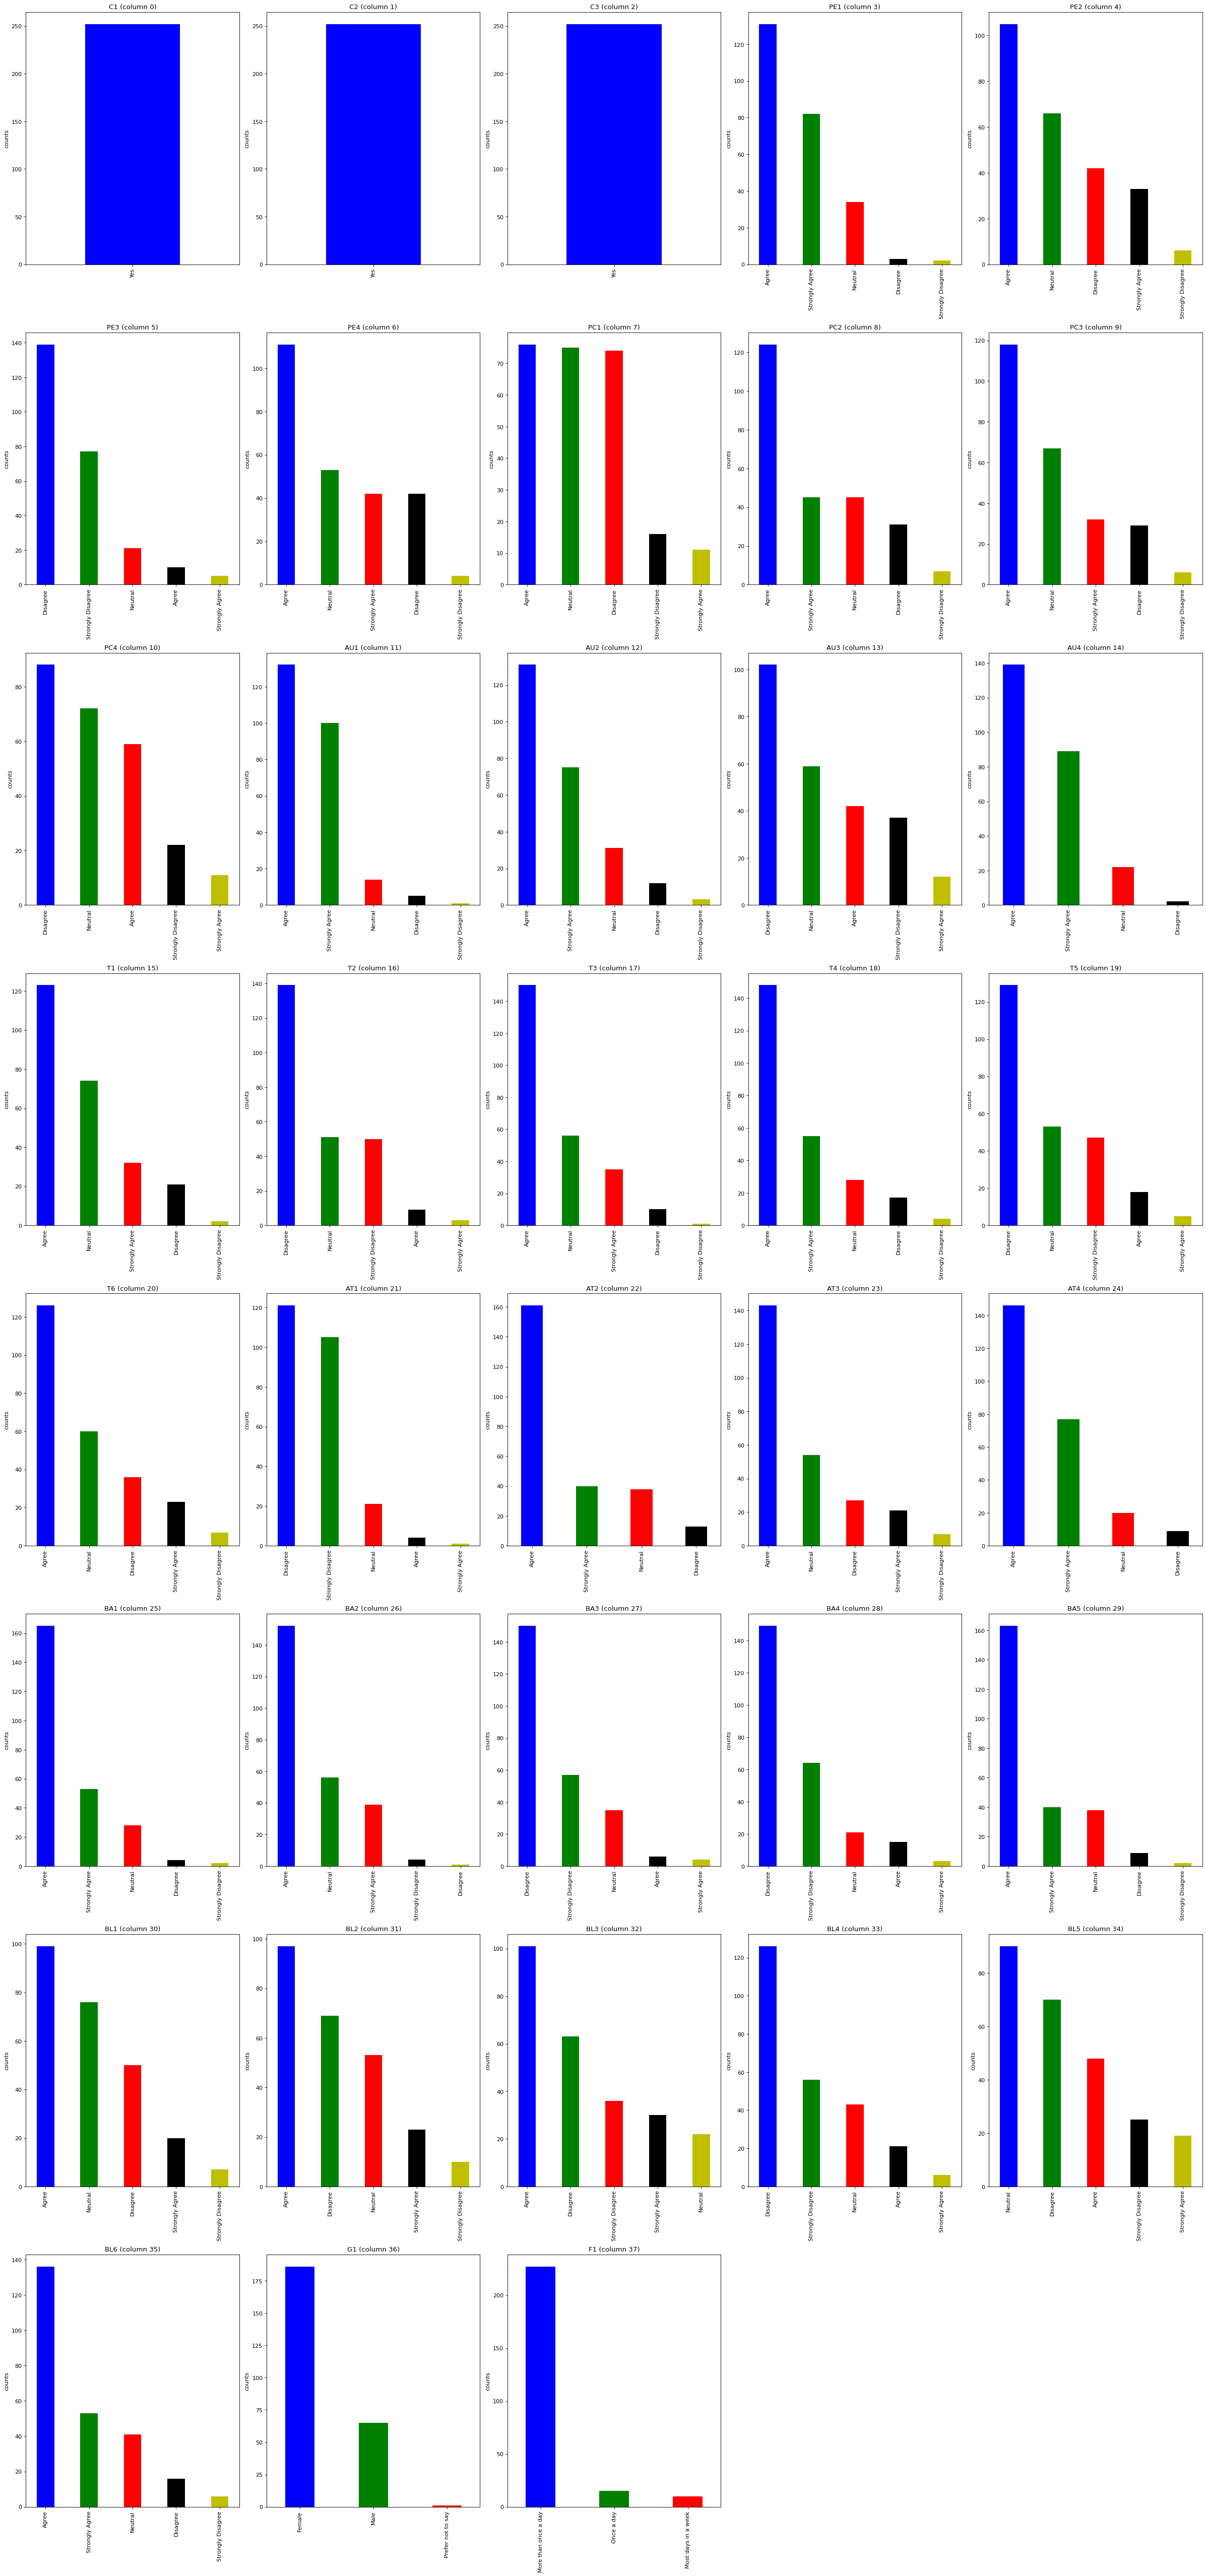

In [283]:

import math
nGraphPerRow = 5
nCol = 5
number_of_questions = len(questions)
nGraphRow = math.ceil(number_of_questions / nGraphPerRow)
plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
for i in range(number_of_questions):
    plt.subplot(nGraphRow, nGraphPerRow, i + 1)
    columnDf = derived_data.iloc[:, i+1]
    colors= list('bgrkymc')
    column_counts=columnDf.value_counts()
    handles=column_counts.plot(kind='bar',color=colors,width = 0.4)
    plt.ylabel('counts')
    plt.xticks(rotation = 90) 
    #plt.text(6,max(column_counts)+10,"text")
    plt.title(f'{questions[i]} (column {i})')
plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
plt.show()
  

<h1> CORRELATION

(252, 39)
   PE1  PE2  PE3  PE4  PC1  PC2  PC3  PC4  AU1  AU2  ...  BA4  BA5  BL1  BL2  \
0    5    4    2    5    3    4    4    4    5    5  ...    1    5    3    4   
1    4    3    2    3    2    4    4    4    4    4  ...    2    4    3    3   
2    5    4    1    4    3    4    4    1    5    4  ...    1    5    4    4   
3    4    4    4    4    4    4    4    4    4    4  ...    4    4    4    4   
4    4    4    2    4    2    4    3    2    4    4  ...    2    4    4    4   

   BL3  BL4  BL5  BL6  G1  F1  
0    1    2    4    4   2   1  
1    4    1    3    4   1   3  
2    3    2    4    4   2   1  
3    4    4    4    4   1   3  
4    4    2    3    4   2   1  

[5 rows x 35 columns]
(252, 35)


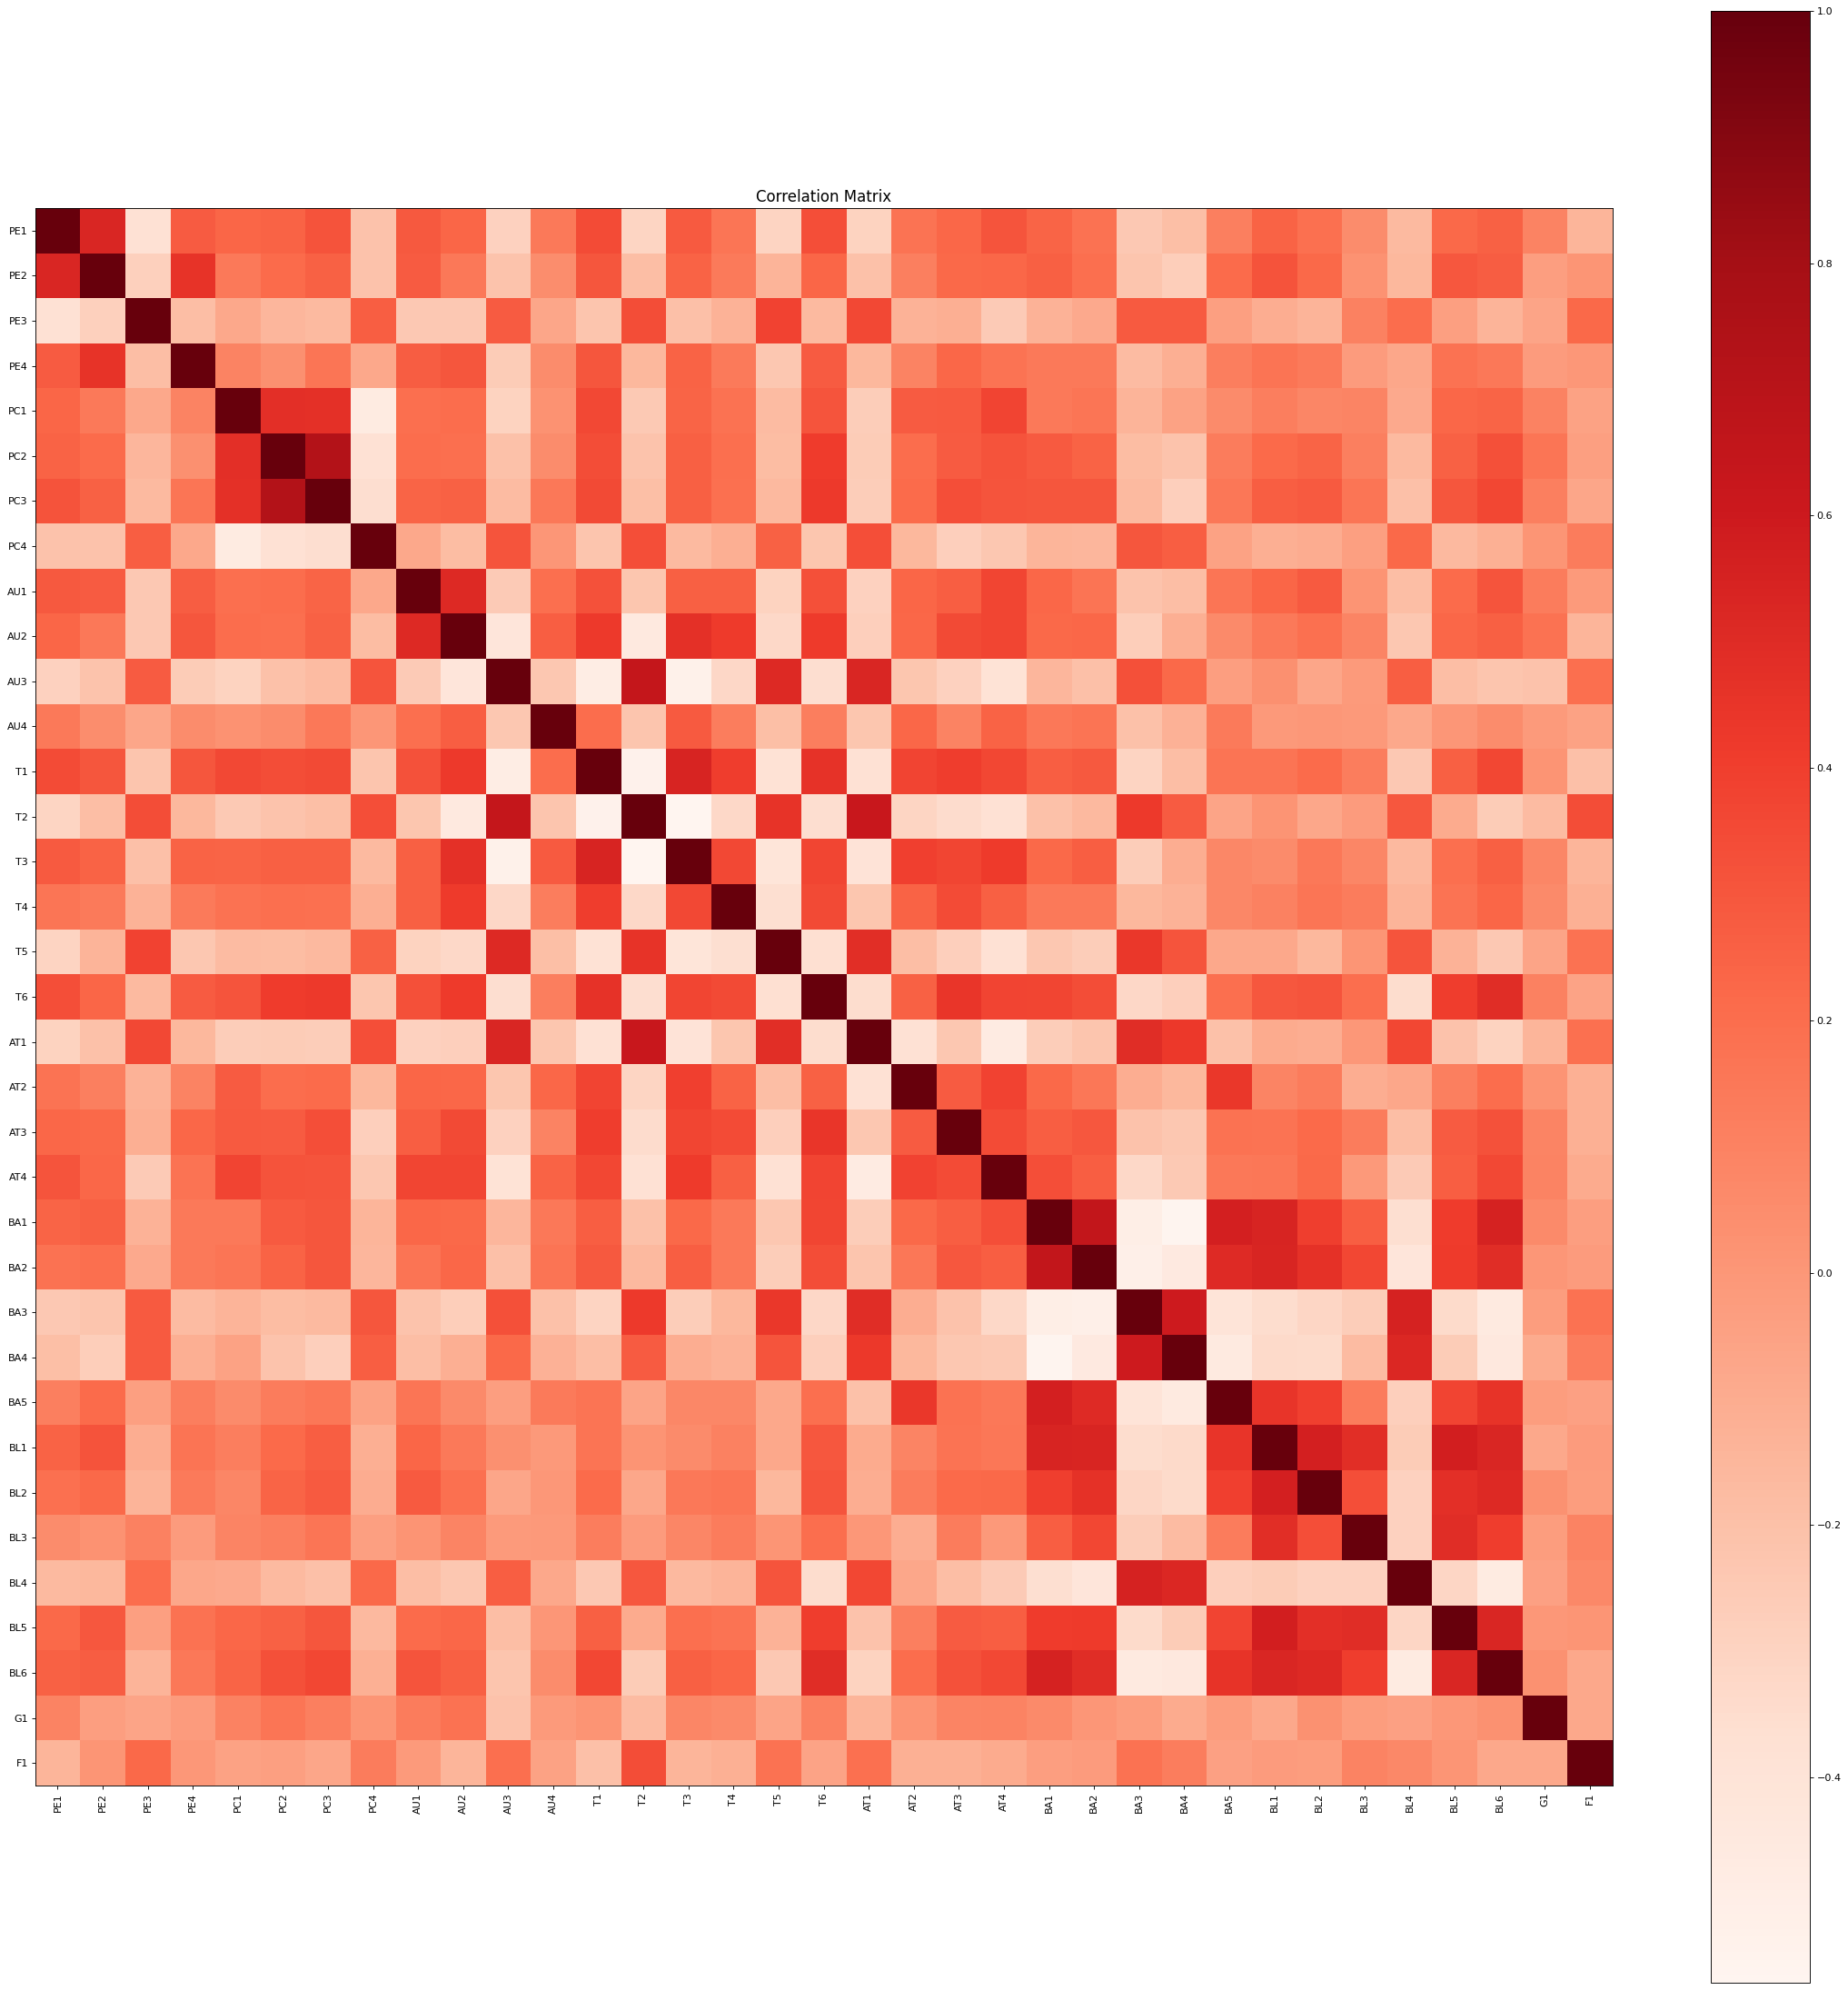

,PE1,PE2,PE3,PE4,PC1,PC2,PC3,PC4,AU1,AU2,...,BA4,BA5,BL1,BL2,BL3,BL4,BL5,BL6,G1,F1
0,5,4,2,5,3,4,4,4,5,5,...,1,5,3,4,1,2,4,4,2,1
1,4,3,2,3,2,4,4,4,4,4,...,2,4,3,3,4,1,3,4,1,3
2,5,4,1,4,3,4,4,1,5,4,...,1,5,4,4,3,2,4,4,2,1
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,1,3
4,4,4,2,4,2,4,3,2,4,4,...,2,4,4,4,4,2,3,4,2,1


In [263]:
graphWidth=35
print(derived_data.shape)
#corr_derived_data= derived_data[[col for col in derived_data if derived_data[col].nunique() > 1]]
corr_derived_data=data.copy()
corr_derived_data.drop(corr_derived_data.columns[[0]], axis=1, inplace=True)
#corr_derived_data= derived_data[[col for col in derived_data if derived_data[col].nunique() > 1]]
corr_derived_data= corr_derived_data[[col for col in corr_derived_data if corr_derived_data[col].nunique() > 1]]
print(corr_derived_data.head())
print(corr_derived_data.shape)
corr = corr_derived_data.corr(method='pearson')
plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1,cmap=plt.get_cmap('Reds'))
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()
corr_derived_data.head()

<h1> SCATTER PLOT

   PE1  PE2  PE3  PE4  PC1  PC2  PC3  PC4  AU1  AU2  ...  BA4  BA5  BL1  BL2  \
0    5    4    2    5    3    4    4    4    5    5  ...    1    5    3    4   
1    4    3    2    3    2    4    4    4    4    4  ...    2    4    3    3   
2    5    4    1    4    3    4    4    1    5    4  ...    1    5    4    4   
3    4    4    4    4    4    4    4    4    4    4  ...    4    4    4    4   
4    4    4    2    4    2    4    3    2    4    4  ...    2    4    4    4   

   BL3  BL4  BL5  BL6  G1  F1  
0    1    2    4    4   2   1  
1    4    1    3    4   1   3  
2    3    2    4    4   2   1  
3    4    4    4    4   1   3  
4    4    2    3    4   2   1  

[5 rows x 35 columns]
(252, 35)


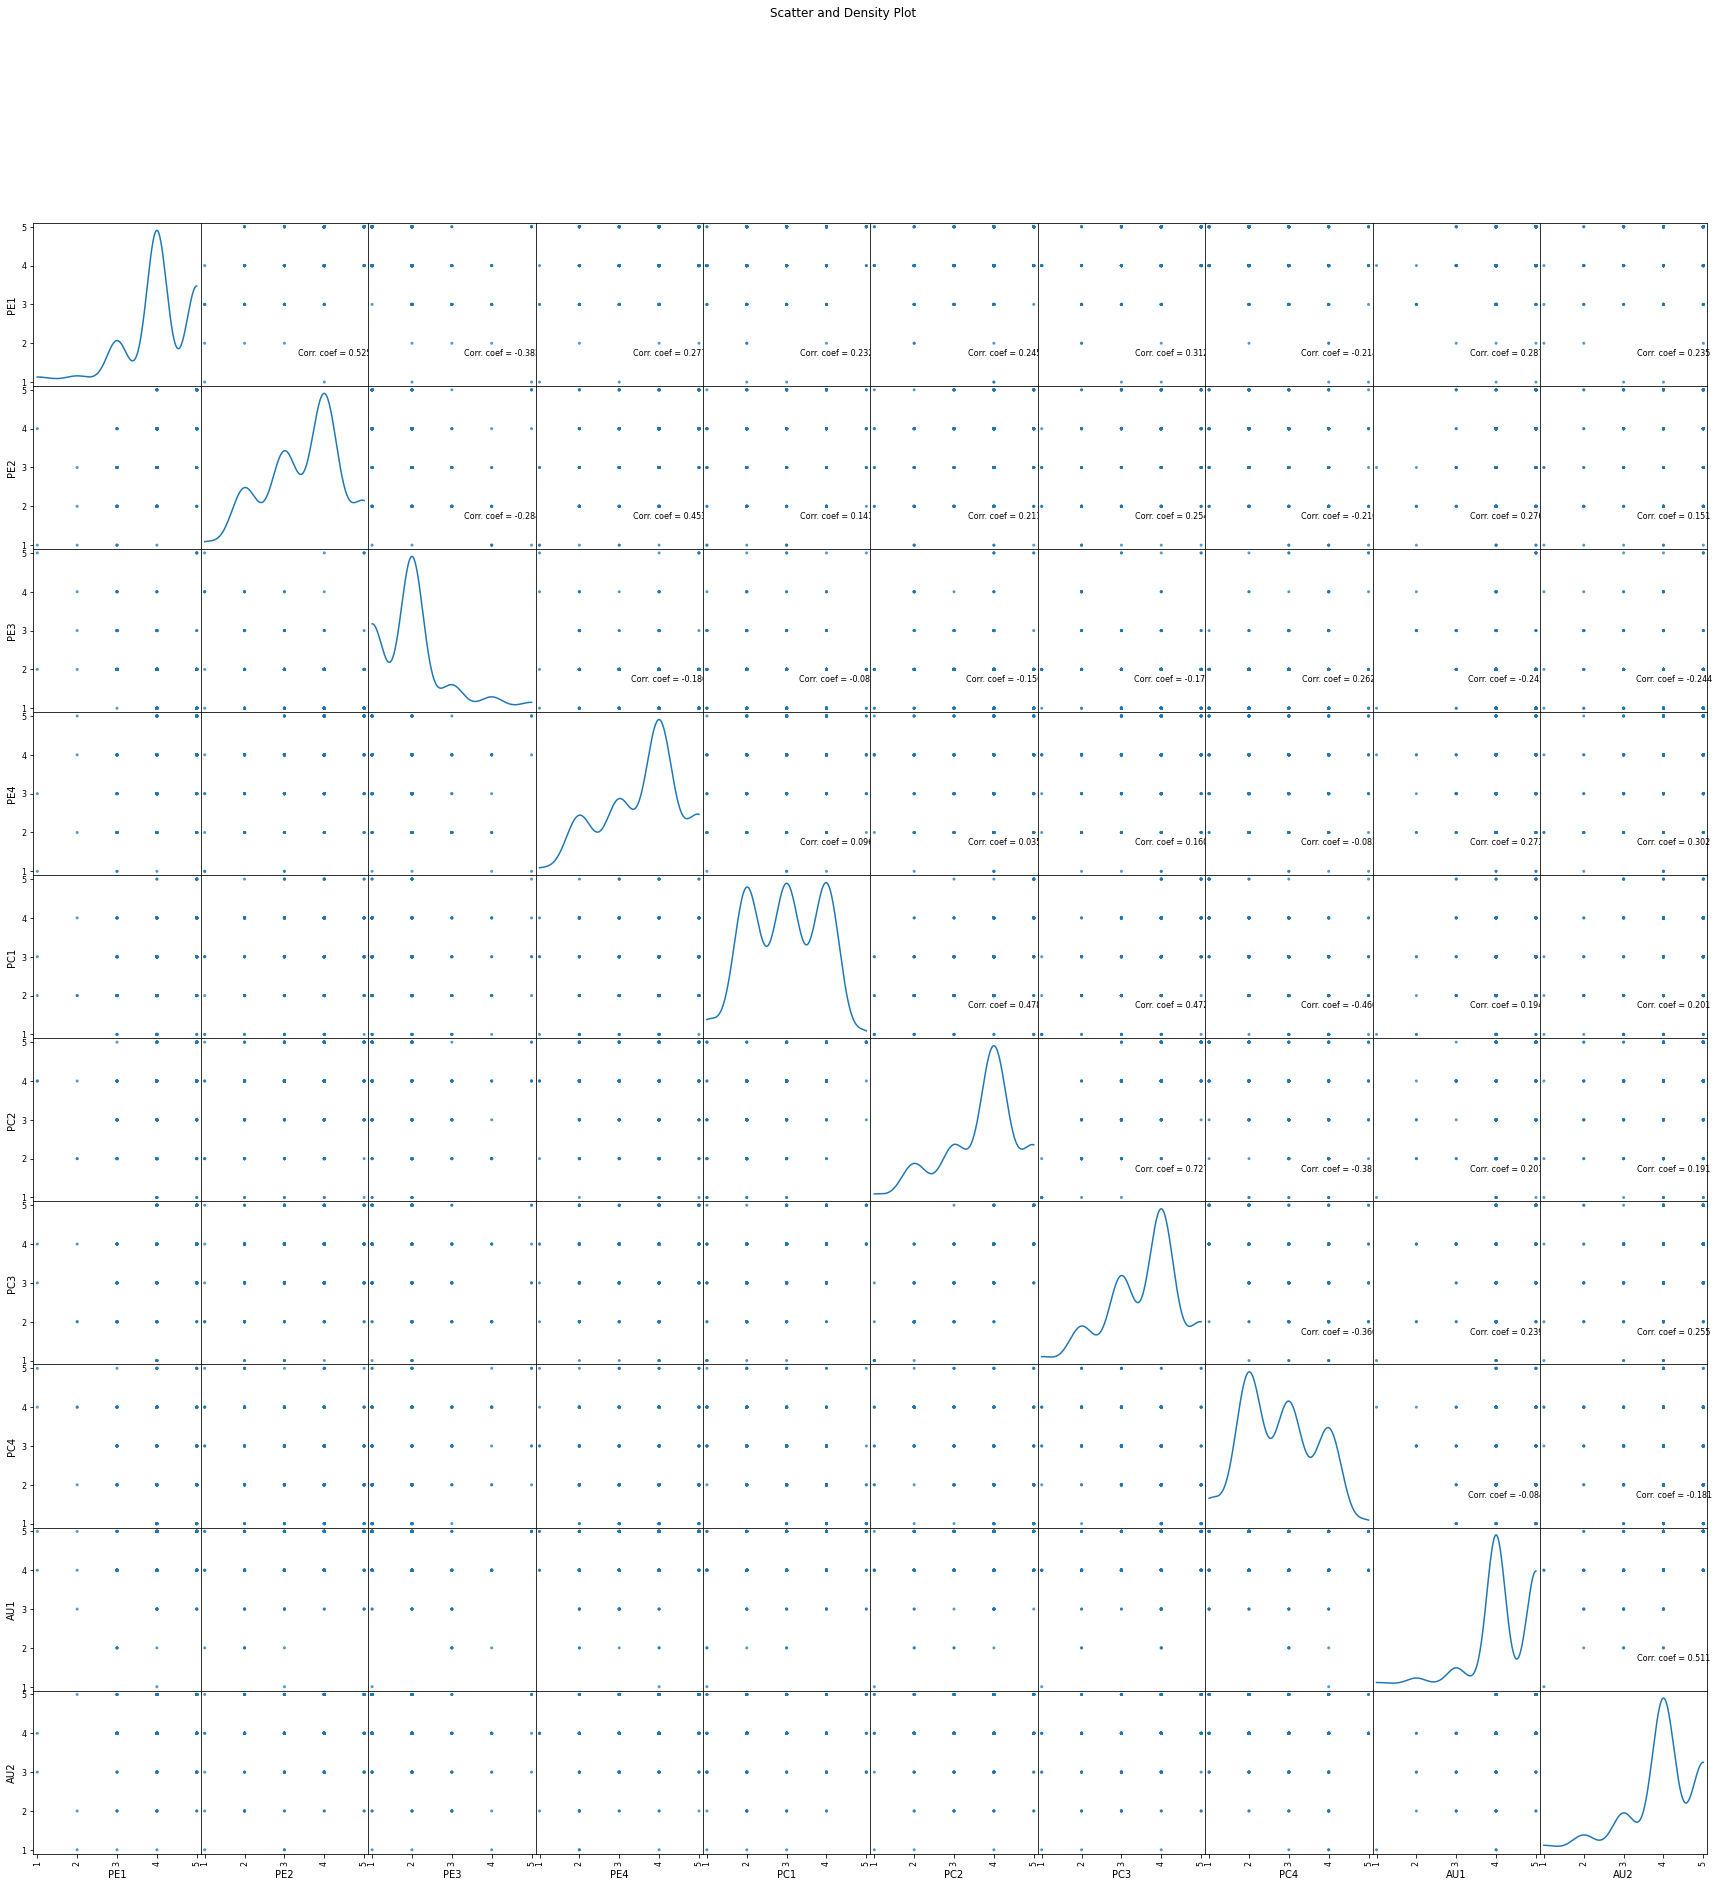

,PE1,PE2,PE3,PE4,PC1,PC2,PC3,PC4,AU1,AU2
0,5,4,2,5,3,4,4,4,5,5
1,4,3,2,3,2,4,4,4,4,4
2,5,4,1,4,3,4,4,1,5,4
3,4,4,4,4,4,4,4,4,4,4
4,4,4,2,4,2,4,3,2,4,4


In [264]:
plotSize=30
textSize=8
#corr_derived_data= derived_data[[col for col in derived_data if derived_data[col].nunique() > 1]]
scatter_derived_data=data.copy()
scatter_derived_data.drop(scatter_derived_data.columns[[0]], axis=1, inplace=True)
#corr_derived_data= derived_data[[col for col in derived_data if derived_data[col].nunique() > 1]]
scatter_derived_data= scatter_derived_data[[col for col in scatter_derived_data if scatter_derived_data[col].nunique() > 1]]
print(scatter_derived_data.head())
print(scatter_derived_data.shape)
columnNames = list(scatter_derived_data)
columnNames = columnNames[:10]
scatter_derived_data = scatter_derived_data[columnNames]
ax = pd.plotting.scatter_matrix(scatter_derived_data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
scatter_corr = corr_derived_data.corr(method='pearson').values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('Corr. coef = %.3f' % scatter_corr[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
plt.suptitle('Scatter and Density Plot')
plt.show()
scatter_derived_data.head()

<h1> P-VALUES

In [265]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

(252, 39)
   PE1  PE2  PE3  PE4  PC1  PC2  PC3  PC4  AU1  AU2  ...  BA4  BA5  BL1  BL2  \
0    5    4    2    5    3    4    4    4    5    5  ...    1    5    3    4   
1    4    3    2    3    2    4    4    4    4    4  ...    2    4    3    3   
2    5    4    1    4    3    4    4    1    5    4  ...    1    5    4    4   
3    4    4    4    4    4    4    4    4    4    4  ...    4    4    4    4   
4    4    4    2    4    2    4    3    2    4    4  ...    2    4    4    4   

   BL3  BL4  BL5  BL6  G1  F1  
0    1    2    4    4   2   1  
1    4    1    3    4   1   3  
2    3    2    4    4   2   1  
3    4    4    4    4   1   3  
4    4    2    3    4   2   1  

[5 rows x 35 columns]
(252, 35)


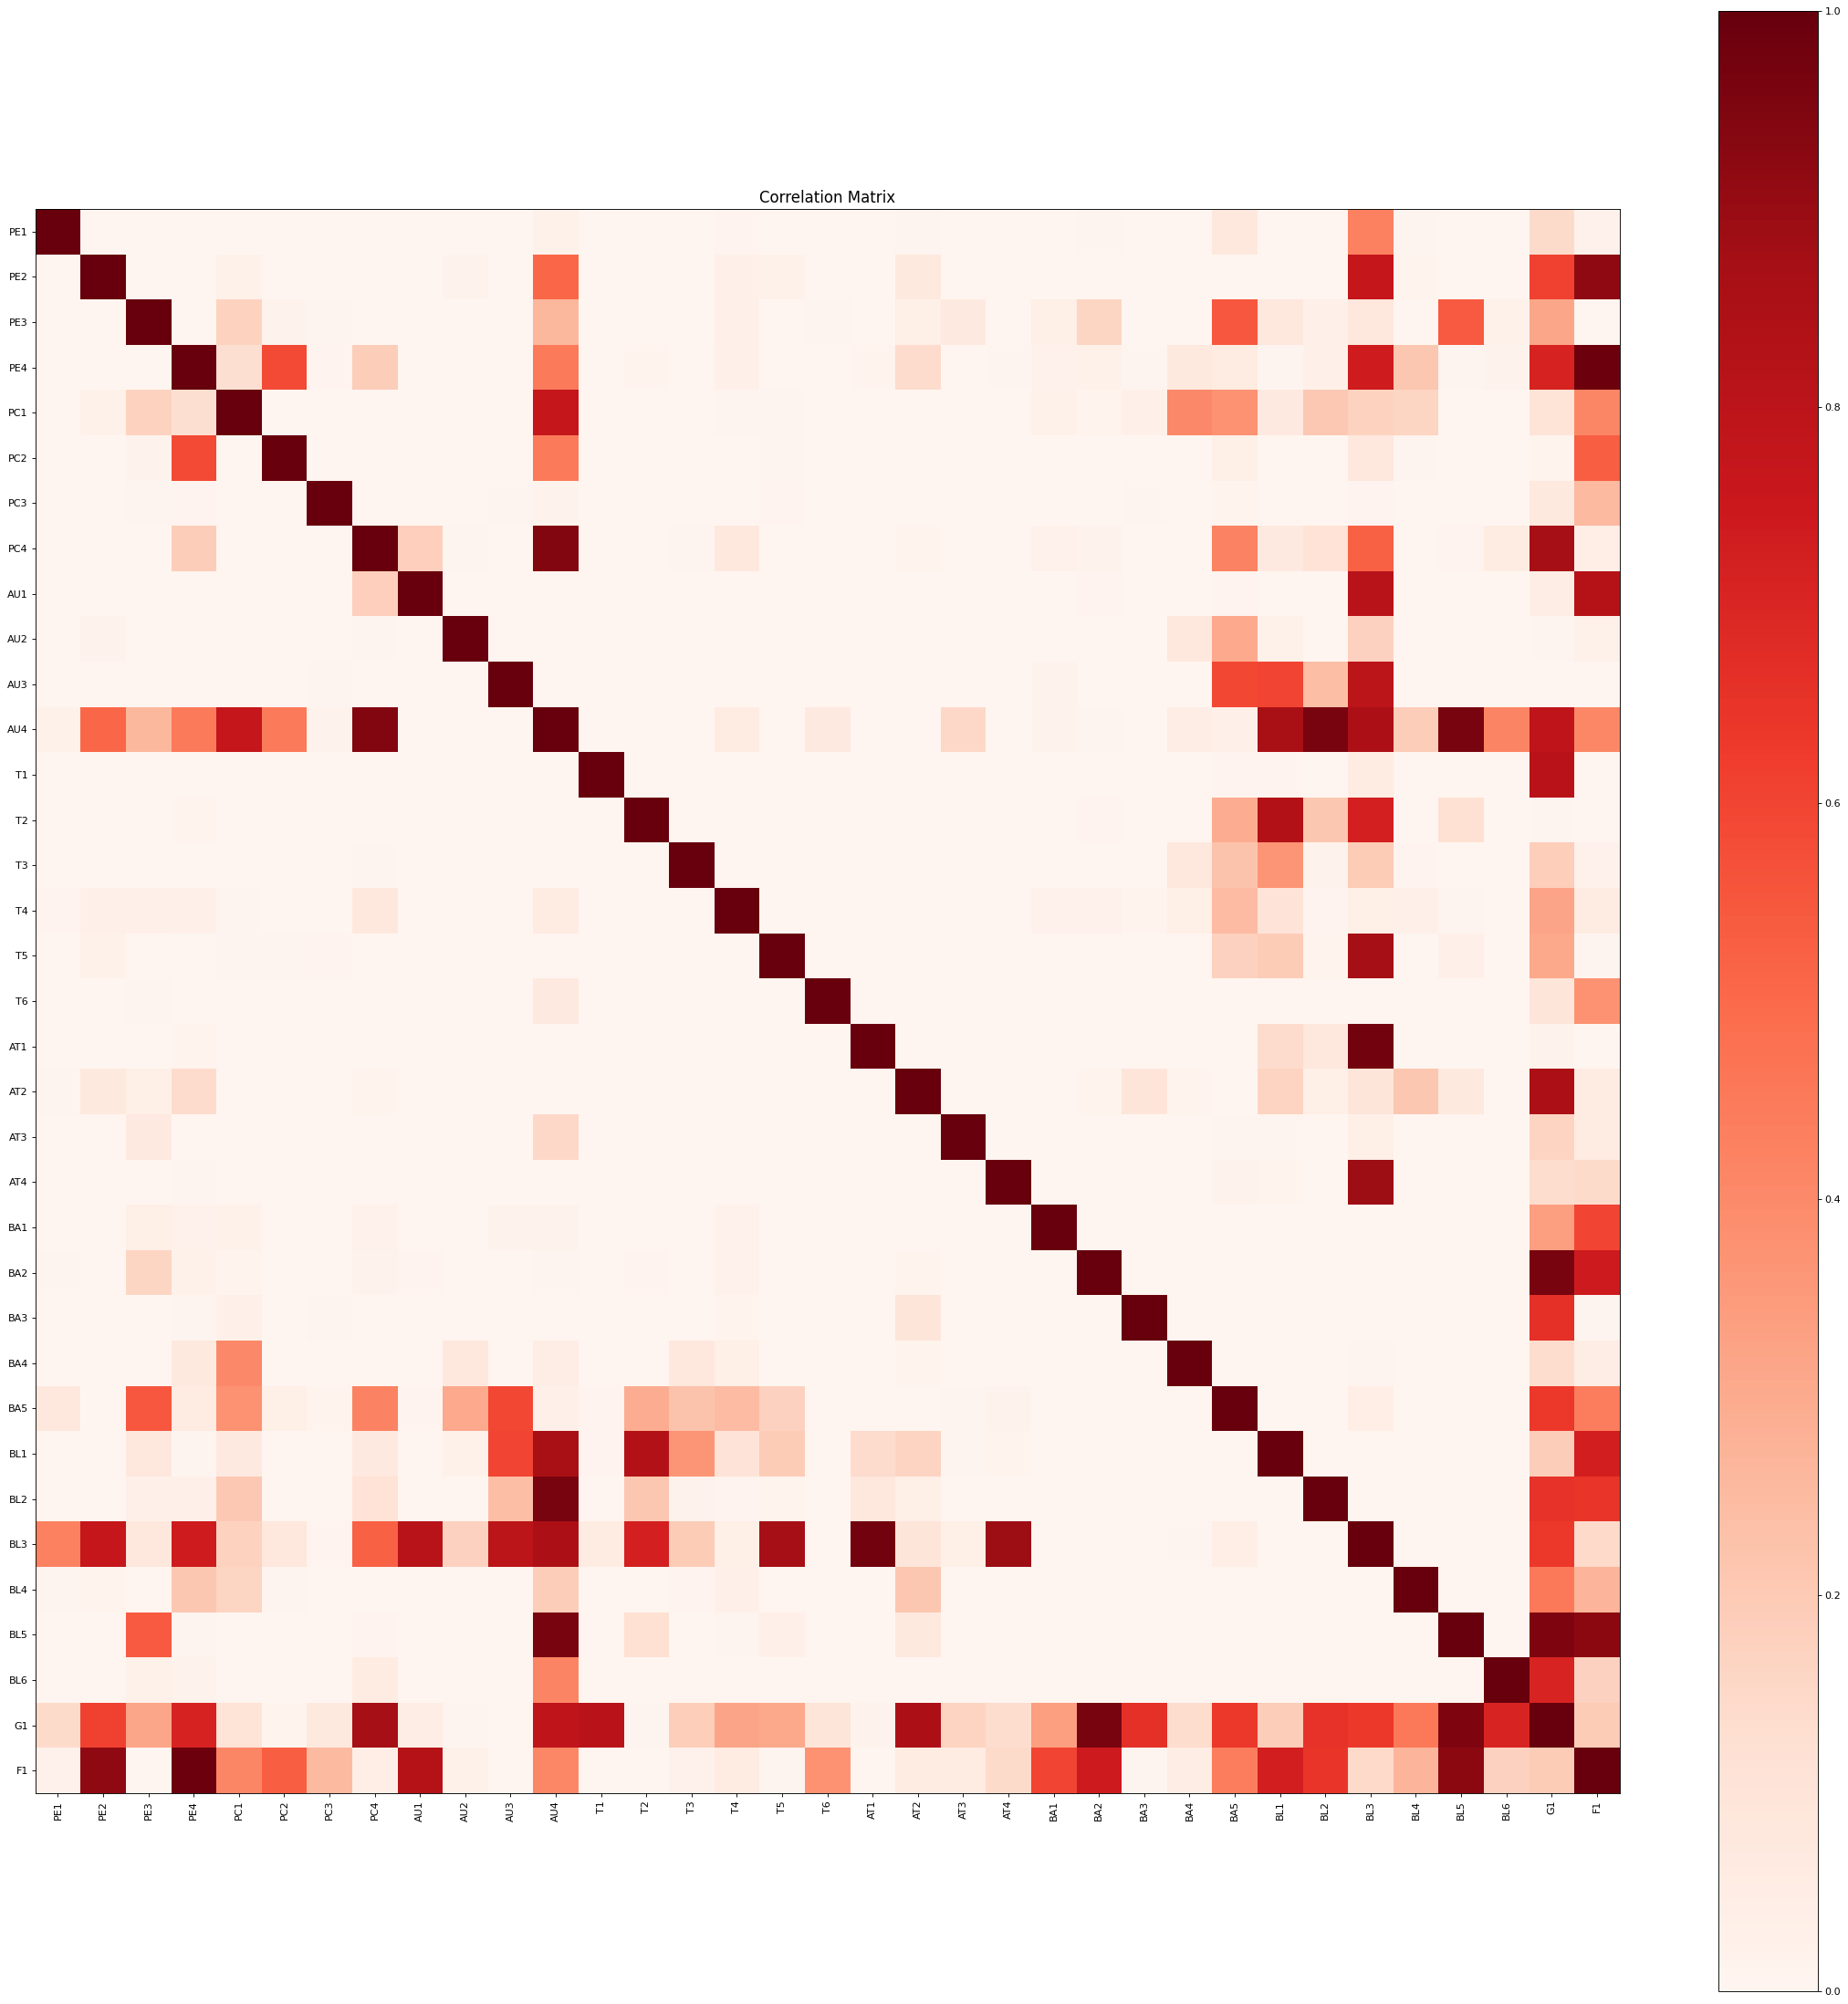

,PE1,PE2,PE3,PE4,PC1,PC2,PC3,PC4,AU1,AU2,...,BA4,BA5,BL1,BL2,BL3,BL4,BL5,BL6,G1,F1
0,5,4,2,5,3,4,4,4,5,5,...,1,5,3,4,1,2,4,4,2,1
1,4,3,2,3,2,4,4,4,4,4,...,2,4,3,3,4,1,3,4,1,3
2,5,4,1,4,3,4,4,1,5,4,...,1,5,4,4,3,2,4,4,2,1
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,1,3
4,4,4,2,4,2,4,3,2,4,4,...,2,4,4,4,4,2,3,4,2,1


In [266]:
graphWidth=35
print(derived_data.shape)
#corr_derived_data= derived_data[[col for col in derived_data if derived_data[col].nunique() > 1]]
p_derived_data=data.copy()
p_derived_data.drop(p_derived_data.columns[[0]], axis=1, inplace=True)
#corr_derived_data= derived_data[[col for col in derived_data if derived_data[col].nunique() > 1]]
p_derived_data= p_derived_data[[col for col in p_derived_data if p_derived_data[col].nunique() > 1]]
print(p_derived_data.head())
print(p_derived_data.shape)
p = p_derived_data.corr(method=pearsonr_pval)
plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
pMat = plt.matshow(p, fignum = 1,cmap=plt.get_cmap('Reds'))
plt.xticks(range(len(p.columns)), p.columns, rotation=90)
plt.yticks(range(len(p.columns)), p.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(pMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()
p_derived_data.head()

<h3> Find Higly Correlated columns

In [267]:
def find_correlated_features(df, threshold, target_variables):
    corr_val=df.corr(method='pearson')
    corr_val=corr_val.loc[:,target_variables]
    corr_val=corr_val.drop(target_variables)
    corr_val = corr_val[corr_val.abs() >= threshold]
    return corr_val

correlation_coeff = find_correlated_features(corr_derived_data, .3, ['BL1','BL2','BL3','BL4','BL5','BL6'])

In [273]:
correlation_coeff

,BL1,BL2,BL3,BL4,BL5,BL6
PE1,NaN,NaN,NaN,NaN,NaN,NaN
PE2,0.315338,NaN,NaN,NaN,NaN,NaN
PE3,NaN,NaN,NaN,NaN,NaN,NaN
PE4,NaN,NaN,NaN,NaN,NaN,NaN
PC1,NaN,NaN,NaN,NaN,NaN,NaN
PC2,NaN,NaN,NaN,NaN,NaN,0.323816
PC3,NaN,NaN,NaN,NaN,0.301213,0.362602
PC4,NaN,NaN,NaN,NaN,NaN,NaN
AU1,NaN,NaN,NaN,NaN,NaN,0.309122
AU2,NaN,NaN,NaN,NaN,NaN,NaN


<h3> Find valid P-values

In [268]:
def find_p_value_features(df, threshold, target_variables):
    p_val=df.corr(method=pearsonr_pval)
    p_val=p_val.loc[:,target_variables]
    p_val=p_val.drop(target_variables)
    p_val = p_val[p_val.abs() < threshold]
    return p_val

p_value_coeff = find_p_value_features(corr_derived_data, .05, ['BL1','BL2','BL3','BL4','BL5','BL6'])

In [274]:
p_value_coeff

,BL1,BL2,BL3,BL4,BL5,BL6
PE1,6.401149e-05,3.097807e-03,NaN,6.411031e-03,3.797004e-04,4.273718e-05
PE2,3.188059e-07,4.134527e-04,NaN,1.404507e-02,2.097324e-06,1.644975e-05
PE3,NaN,2.821542e-02,NaN,9.993398e-04,NaN,2.572284e-02
PE4,7.730122e-03,2.965283e-02,NaN,NaN,4.306174e-03,1.867566e-02
PC1,NaN,NaN,NaN,NaN,2.851178e-04,1.044754e-04
PC2,4.995180e-04,1.024232e-04,NaN,6.915791e-03,5.124737e-05,1.462656e-07
PC3,2.155405e-05,5.478672e-06,1.017250e-02,1.616102e-03,1.107851e-06,3.018800e-09
PC4,NaN,NaN,NaN,3.349341e-04,1.049800e-02,NaN
AU1,1.996626e-04,6.254216e-06,NaN,2.511686e-03,9.548711e-04,5.559933e-07
AU2,2.673425e-02,3.529313e-03,NaN,1.486203e-04,3.130222e-04,3.553218e-05


In [269]:
import math
def find_dependent_values(corr_coeff,p_coeff):
    df=corr_coeff.copy()
    n_row = len(corr_coeff)
    n_col = len(p_coeff.columns)
    for x in range(n_col):
        for y in range(n_row):
            a=corr_coeff.iloc[y,x]
            b=p_coeff.iloc[y,x]
            if (math.isnan(a) or math.isnan(b)):
                df.iloc[y,x] = np.nan
            else:
                df.iloc[y,x] = abs(a)
                print(f"x,y is {x},{y} corr is {a} and p_value is: {b}")
    return df

confirmed_corr_df = find_dependent_values(correlation_coeff,p_value_coeff)

x,y is 0,1 corr is 0.3153384468672738 and p_value is: 3.1880594719135226e-07
x,y is 0,22 corr is 0.5412211360434229 and p_value is: 1.4081212143130486e-20
x,y is 0,23 corr is 0.5313205751956596 and p_value is: 9.239595297903112e-20
x,y is 0,24 corr is -0.3526203250657621 and p_value is: 8.623961382589012e-09
x,y is 0,25 corr is -0.3325964484698487 and p_value is: 6.3622809054212e-08
x,y is 0,26 corr is 0.4495645965599474 and p_value is: 6.11191685433441e-14
x,y is 1,17 corr is 0.30810567435193886 and p_value is: 6.08195551903535e-07
x,y is 1,22 corr is 0.40109235117856623 and p_value is: 3.707234713020918e-11
x,y is 1,23 corr is 0.46760681506461405 and p_value is: 4.285240411748222e-15
x,y is 1,24 corr is -0.3135885181831736 and p_value is: 3.7331934765394196e-07
x,y is 1,25 corr is -0.3386066512672564 and p_value is: 3.544197576973019e-08
x,y is 1,26 corr is 0.3922522621609013 and p_value is: 1.0718108001509719e-10
x,y is 2,23 corr is 0.3649203449877203 and p_value is: 2.3534170507347

In [285]:
import math
def print_dependent_columns(corr_df):
    col_list = []
    corr_df_index=confirmed_corr_df.index
    n_row = len(corr_df)
    for row in range(n_row):
        row_vals = corr_df.iloc[row,:]
        max_val=row_vals.max()
        if (not (math.isnan(max_val))):
            col_list.append([corr_df_index[row],max_val])
    return col_list
            
important_values = print_dependent_columns(confirmed_corr_df)
            

<h2> Plot Important Values

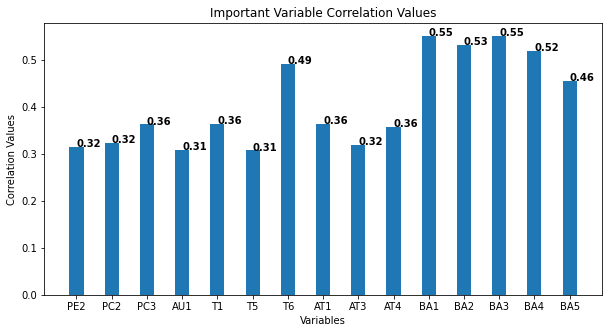

In [290]:
plt_key=[a[0] for a in important_values]
plt_val=[a[1] for a in important_values]
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
colors= list('rgbkymc')
plt.bar(plt_key, plt_val,
        width = 0.4)
plt.ylabel("Correlation Values")
plt.xlabel("Variables")
plt.title("Important Variable Correlation Values")
for index, value in enumerate(plt_val):
    plt.text(index, value,
             str(round(value,2)), fontweight = 'bold')
plt.show()

<h5> From the result obtained, it can be concluded that the brand loyalty depends on the following factors:
<h5> Weakly on Perceived Expertise
<h5> Weakly on Perceived congruence
<h5> Weakly on Influencer Authenticity
<h5> Fairly on Trust
<h5> Fairly on Attitude towards influencer
<h5> Fairly on Brand Attitude